# Image Transformation using opencv

**Removing Perspective from an Image**

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage
from skimage import io, color, measure
import pandas as pd
import copy
from PIL import Image
from IPython.display import display

from pathlib import Path

## Short lesson

opencv has a function called warpPerspective() that helps correct an image when the camera was not perfectly parallel with the scene, i.e. the image has some perspective in it.  For example, let's look at an extreme case.  I wanted a picture parallel to the top of this coffee mug but instead I have this angled shot.  Let's see if we can remove the perspective and turn the rim of the mug into a circle.   

This is an extreme case.  A more likely scenario is if you use your cell phone to take a picture of a data plot or microscopy image.  It is difficult to keep your camera parallel and centered on the subject of interest.  

:::{image} ../images/14_coffee_mug.jpg
:width: 200px
:align: center
:::

<img alt="" src="../images/../images/14_coffee_mug.jpg" width=200px>

Use the interactive plot `%matplotlib widget` to read off the pixels manually from the left, right, front and back points of the mug rim.  Try to make the left-right points orthogonal to the front-back points.  

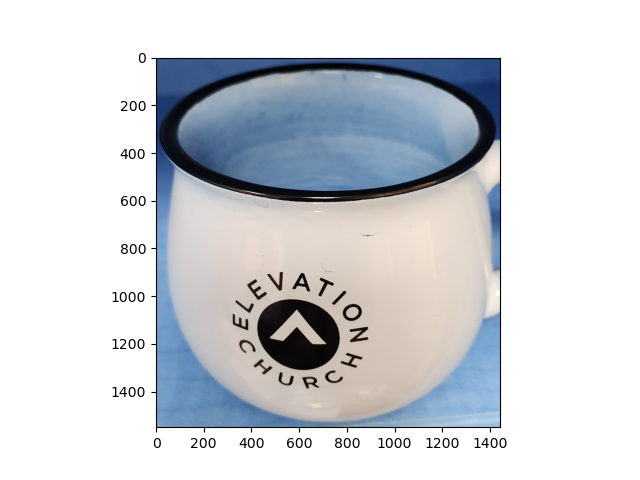

In [3]:
%matplotlib widget
img = cv.imread('../images/14_coffee_mug.jpg')
plt.imshow(img)

In [5]:
# picked pts on rim: [[left],[right],[front],[back]]
# I'm not using our selectdata function.  I'm just recording these below manually.  
pix1=[[14,307],[1423,290],[685,597],[714,18]]
# These points are shown below as cyan dots.  

:::{image} ../images/14_mug_transform.png
:width: 300px
:align: center
:::

<img alt="" src="../images/../images/14_mug_transform.png" width=300px>

In [6]:
# let's keep the left and right sides the same but change the front and back points (cyan)
# to that of a circle (green points) as shown above.  
# the radius of the above circle is 
x_radius=(1423-14)/2
# the mid point of the left and right points
xcenter=(1423+14)/2
ycenter=(307+290)/2
# the front and back points should be located at [xcenter, ycenter +- radius]
pix2=[[14,ycenter],[1423,ycenter],[xcenter,ycenter+x_radius],[xcenter,ycenter-x_radius]]
pix2

[[14, 298.5], [1423, 298.5], [718.5, 1003.0], [718.5, -406.0]]

In [7]:
# notice we have one value with a negative value 
# Let's translate our points in y to make this value positive or zero
# just remember to translate all points
pix2=np.array(pix2)+[0,406]
pix2

array([[  14. ,  704.5],
       [1423. ,  704.5],
       [ 718.5, 1409. ],
       [ 718.5,    0. ]])

Now we can transform the image.  

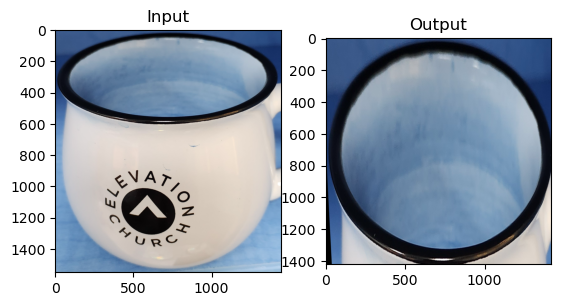

In [8]:
%matplotlib inline
rows,cols,ch = img.shape
pts1 = np.float32(pix1) #start values
pts2 = np.float32(pix2) #end values
M = cv.getPerspectiveTransform(pts1,pts2) #get matrix for transformation, M
dst = cv.warpPerspective(img,M,(1420,1420)) # size of final image to show - adjust as needed
plt.subplot(121),plt.imshow(img, aspect=1),plt.title('Input')
plt.subplot(122),plt.imshow(dst,aspect=1),plt.title('Output')
plt.show()

## Exercises

### Problem 1

#### Aluminum hexagonal structure

The honeycomb structure below is composed of hexagonally packed cylindrical shells 2 inches in length and 1 inch inside diameter.  (1) Remove the distortion from the image as shown in the lesson above. (2) Find the area fraction of aluminum in the corrected image of (1) using our analysis of the last chapter. (3) Using the area fraction determined in (2), calculate the weight of a 4x8 sheet 2 inches thick and compare to that of a solid sheet of the same dimensions. Assume the material here is pure aluminum.    

:::{image} ../images/13_honeycomb_skew.png
:width: 600px
:align: center
:::

<img alt="" src="../images/13_honeycomb_skew.png" width=600px>

::: {Hint}
The exact values of the final points (pts2) that you specify are not important but the distances between the points (both x & y) are critical.  The correct ratio of distances should be determined by counting the number of unit lengths between circle centers.  My points are shown in cyan below.  The relative distance in the verticle direction can be determined by considering the height of an equilateral triangle as also shown below and taking the distance between the centers of neighboring circles to equal 1.0  
:::

:::{image} ../images/14_hex_pattern_pts.png
:width: 500px
:align: center
:::

<img alt="" src="../images/../images/14_hex_pattern_pts.png" width=500px>

### Problem 2

The fibers in the top half of the image have circular cross sections.  Determine the angle that this cross section deviates from perpendicular (i.e. where the fibers would be perfectly circular).  Determine the cross sectional area of the fibers (correct for the fact that they are cut at an angle).  Hint:  The centroids may be helpful in defining the elliptical shape.  

:::{image} ../images/13_CFRP_flickr_com_photos_zeissmicro_17365095348.png
:width: 600px
:align: center
:::

<img alt="" src="../images/13_CFRP_flickr_com_photos_zeissmicro_17365095348.png" width=600px>